In [33]:
# Import libraries
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [34]:
# Read in Adj Close prices from csv
stock_df = pd.read_csv("Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Adj Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-15    707.940002
2021-03-16    676.880005
2021-03-17    701.809998
2021-03-18    653.159973
2021-03-19    654.869995
Name: Adj Close, dtype: float64

In [35]:
# Calculate stock returns
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2018-03-20   -0.009599
2018-03-21    0.019256
2018-03-22   -0.023473
2018-03-23   -0.024458
2018-03-26    0.008755
Name: Adj Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

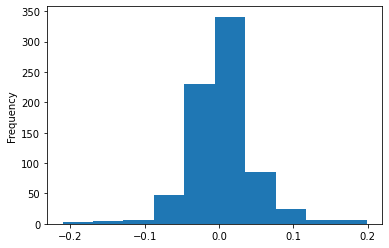

In [36]:
# Plot frequency distribution of returns
returns.plot(kind="hist")

In [37]:
# Calculate mean and standard dev of returns
mean = returns.mean()
std = returns.std()
(mean, std)

(0.004084559241466523, 0.044342739787770785)

In [38]:
from random import gauss
# Calculate the specific normal distribution of analyzed stock based on its average returns and standard deviation
gauss(mean, std)

-0.006876564918894038

In [39]:
# Read in last stock price
last_val = stock_df.iloc[-1]
last_val

654.8699951171875

In [40]:
# Simulate the next stock value based on probability distribution
last_val * (1+gauss(mean,std))

675.8785691998113

In [42]:
# Function to simulate stock prices
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        

    return simvals

In [43]:
# Simulate next 15 day stock prices based on the last price
simulate_stocks(15,last_val)

[654.8699951171875,
 642.4978191371611,
 675.1257972540228,
 654.3841030953164,
 682.4844763058849,
 697.2365692993634,
 717.8433784155898,
 733.8887799381799,
 706.2249421700066,
 718.8546918534646,
 773.8681018707728,
 813.565724479446,
 792.3868073819039,
 735.9038176007962,
 735.7139074946651,
 776.6880289783555]

In [44]:
# Simulate stock prices based on 1000 different random scenarios
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [45]:
# Create dataframe of possible stock prices based on 1000 random scenarios
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,654.869995,732.408271,745.782561,718.237004,755.789913,744.272803,723.221127,715.831657,683.342046,691.398668,739.267563,759.248347,757.492139,739.922982,715.109638,693.273948
1,654.869995,656.938633,640.142767,663.635763,622.693933,608.892338,623.968751,614.874009,627.543396,677.429937,680.732260,665.865828,641.230443,684.557251,583.072936,588.108541
2,654.869995,683.034639,708.322516,748.068295,764.681698,752.180770,706.269818,721.017491,680.852742,718.658988,710.997028,708.932488,691.729727,679.876622,695.851268,690.491391
3,654.869995,677.534151,640.931132,640.130553,626.189583,614.752804,554.886677,517.699593,501.664826,493.725417,451.211033,438.889765,460.054985,472.451555,451.525526,499.606582
4,654.869995,666.813833,692.500169,742.950990,742.732126,709.579309,722.666843,791.792186,791.618652,814.192898,759.550773,706.368020,674.305433,667.016656,651.846350,639.341118


In [54]:
# Possible outcomes based on the each of 1000 scenarios (transformed dataframe)
results_df = pd.DataFrame(results).T
results_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
11,759.248347,665.865828,708.932488,438.889765,706.368020,787.965779,820.607044,860.588184,667.564232,795.130281,...,925.497892,574.341568,613.491299,675.016419,703.340011,588.187771,659.917447,741.137574,554.937741,851.268913
12,757.492139,641.230443,691.729727,460.054985,674.305433,754.286749,814.628734,887.312196,684.727739,798.274163,...,932.185680,570.193629,644.211652,713.105018,664.672239,572.421113,673.587382,647.878405,507.181664,864.639171
13,739.922982,684.557251,679.876622,472.451555,667.016656,764.683738,864.450579,846.641467,655.495757,785.130515,...,925.036338,551.730805,639.825310,721.970724,672.940697,580.164601,684.629207,621.473601,513.062775,826.900207
14,715.109638,583.072936,695.851268,451.525526,651.846350,795.725311,825.916447,839.024826,650.945457,801.556006,...,966.403430,585.898344,606.954231,636.615232,645.588843,589.485164,657.551183,633.444326,480.635931,860.010939
15,693.273948,588.108541,690.491391,499.606582,639.341118,776.058516,815.105653,857.081746,660.562547,837.210442,...,1056.093252,582.009974,605.230747,611.502898,683.013695,578.615550,618.072792,653.908136,502.139481,802.476894


<AxesSubplot:>

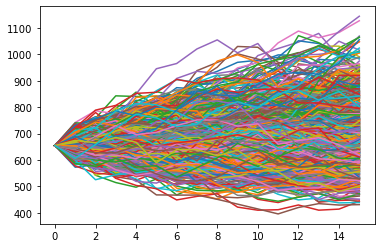

In [47]:
# Plot all possible stock price scenarios
results_df.plot(legend=False)

In [48]:
# Read in the end values (15th day) from the simulation
end_values = results_df.iloc[-1]
end_values.head()

0    693.273948
1    588.108541
2    690.491391
3    499.606582
4    639.341118
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

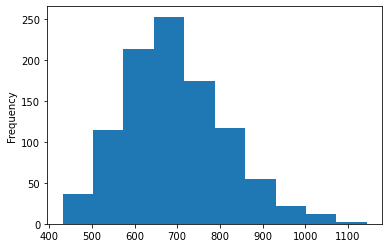

In [49]:
# Plot the probability distribution of end values from the simulation
end_values.plot(kind="hist")

In [50]:
# Calculate the range of possible prices 
end_values.quantile([0.1,0.9])

0.1    547.208216
0.9    854.257828
Name: 15, dtype: float64

In [51]:
# Read in last stock price
last_val

654.8699951171875